In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
import matplotlib
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tqdm import tqdm_notebook as tqdm
matplotlib.rcParams['figure.figsize'] = [15, 15]

In [72]:
# constants
data_path = '/home/raghukul/github/Time_Series_Project/Data/apple_share_price.csv'

In [73]:
# FOR REPRODUCIBILITY
np.random.seed(7)

In [18]:
# IMPORTING DATASET 
dataset = pd.read_csv('../Data/IBM.csv', usecols=[1,2,3,4])
dataset = dataset.reindex(index=dataset.index[::-1])

In [19]:
# TAKING DIFFERENT INDICATORS FOR PREDICTION
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]

In [65]:
def correlation(arr, n):
    mean = np.asarray(arr).mean()
    list1 = []
    list2 = []
    for i in range(len(arr)-n):
        list1.append(arr[i])
    for i in range(n, len(arr)):
        list2.append(arr[i])
    data = {'list1': list1, 'list2': list2}
    df = pd.DataFrame(data)
    cov = 0.0
    for i in range(len(list1)):
        cov += (list1[i] - mean)*(list2[i]-mean)
    return cov/(len(list1))

In [69]:
corrs = []
# arrlist = 
for i in tqdm(range(1, len(diff)-1)):
    corrs.append(correlation(diff, i))

100%|██████████| 2263/2263 [00:03<00:00, 609.35it/s] 


In [66]:
diff = []
for i in range(OHLC_avg.shape[0]-1):
    diff.append(OHLC_avg[i+1]-OHLC_avg[i])

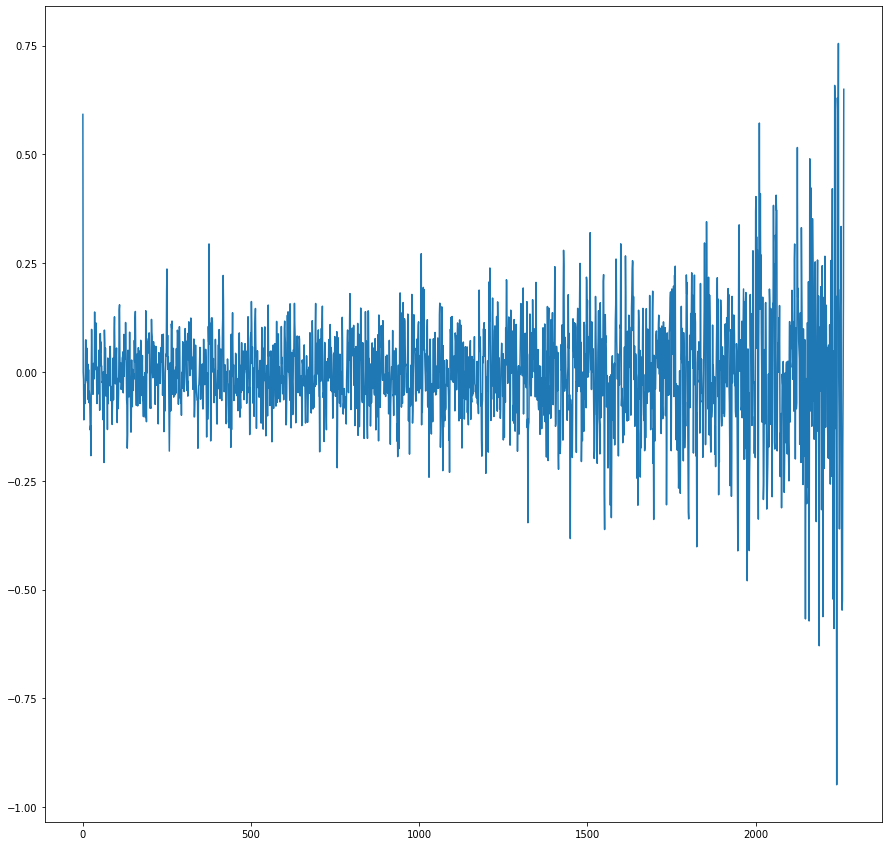

In [70]:
plt.plot(corrs)

In [ ]:
fig,axes = plt.subplots(2,2,sharex=True)
OHLC_avg
axes[0, 0].plot(obs,OHLC_avg); axes[0, 0].set_title('Original Series')
plot_acf(OHLC_avg, ax=axes[0,1],lags=100)
# result = adfuller(OHLC_avg.values)
# print('ADF Statistics: %f' % result[0])
# print('p-value: %f' % result[1])

b = obs[1:]

axes[1, 0].plot(obs,OHLC_avg.diff()); axes[1, 0].set_title('Diff Series')
plot_acf(OHLC_avg.diff(), ax=axes[1,1], lags=100)
plt.show()